## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

## Read the Dataset

In [ ]:
df=pd.read_csv("Data/autos.csv",header=0, sep=',',encoding='Latin1')

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Visualising the Data using EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Uni-Variate Analysis


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

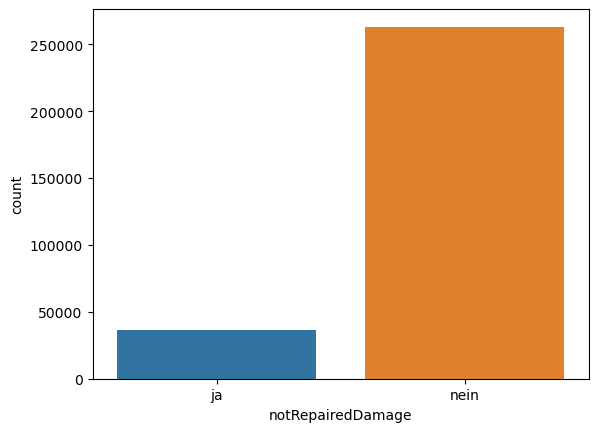

In [ ]:
sns.countplot(df.notRepairedDamage)

<AxesSubplot:xlabel='kilometer', ylabel='count'>

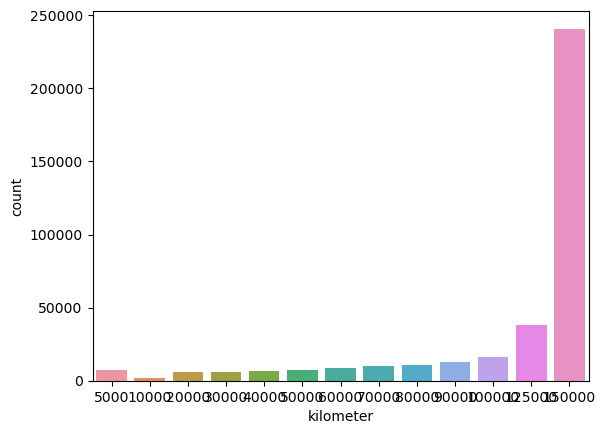

In [ ]:
sns.countplot(df.kilometer)

<AxesSubplot:xlabel='kilometer', ylabel='count'>

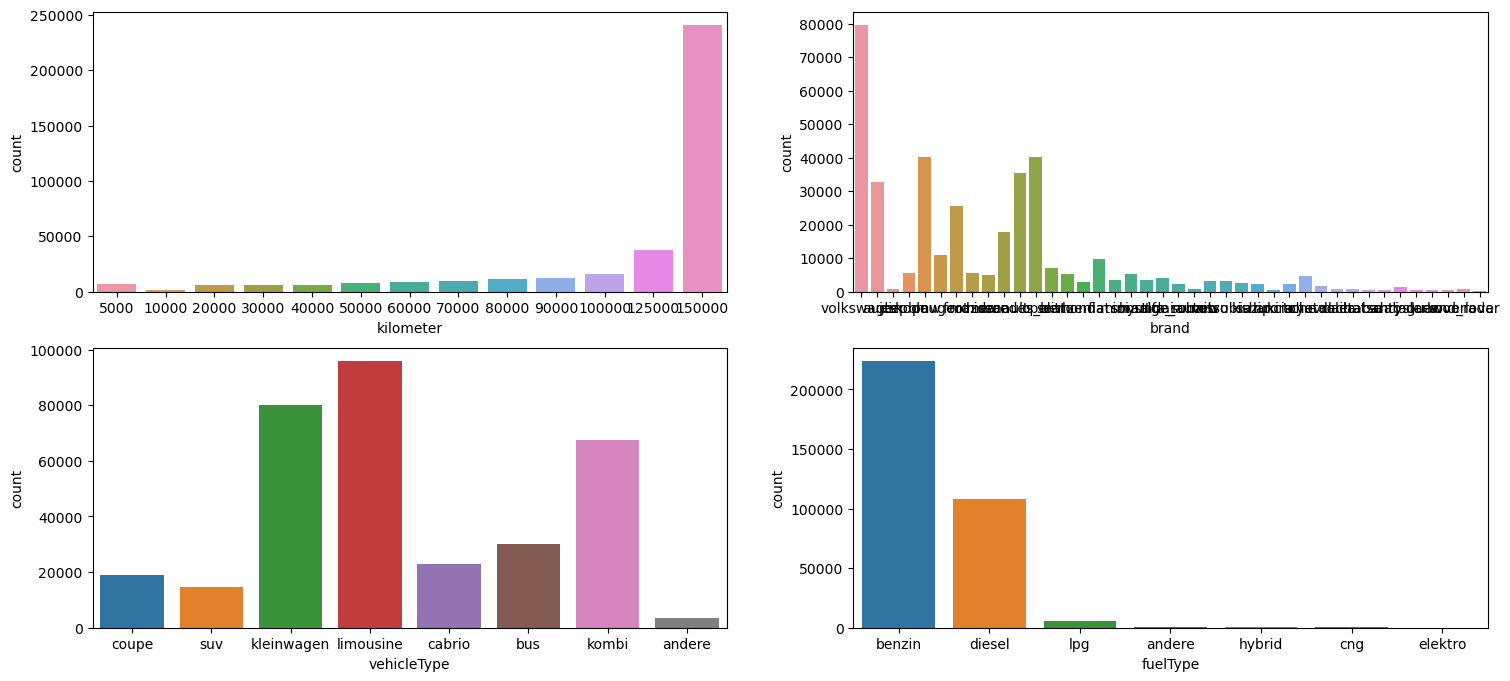

In [ ]:
f, axes = plt.subplots(2,2, figsize=(18,8))
sns.countplot(x='vehicleType',data=df, ax=axes[1,0])
sns.countplot(x='fuelType',data=df,ax=axes[1,1])
sns.countplot(x='brand',data=df,ax=axes[0,1])
sns.countplot(x='kilometer',data=df,ax=axes[0,0])

## Multivariate Analysis

<AxesSubplot:>

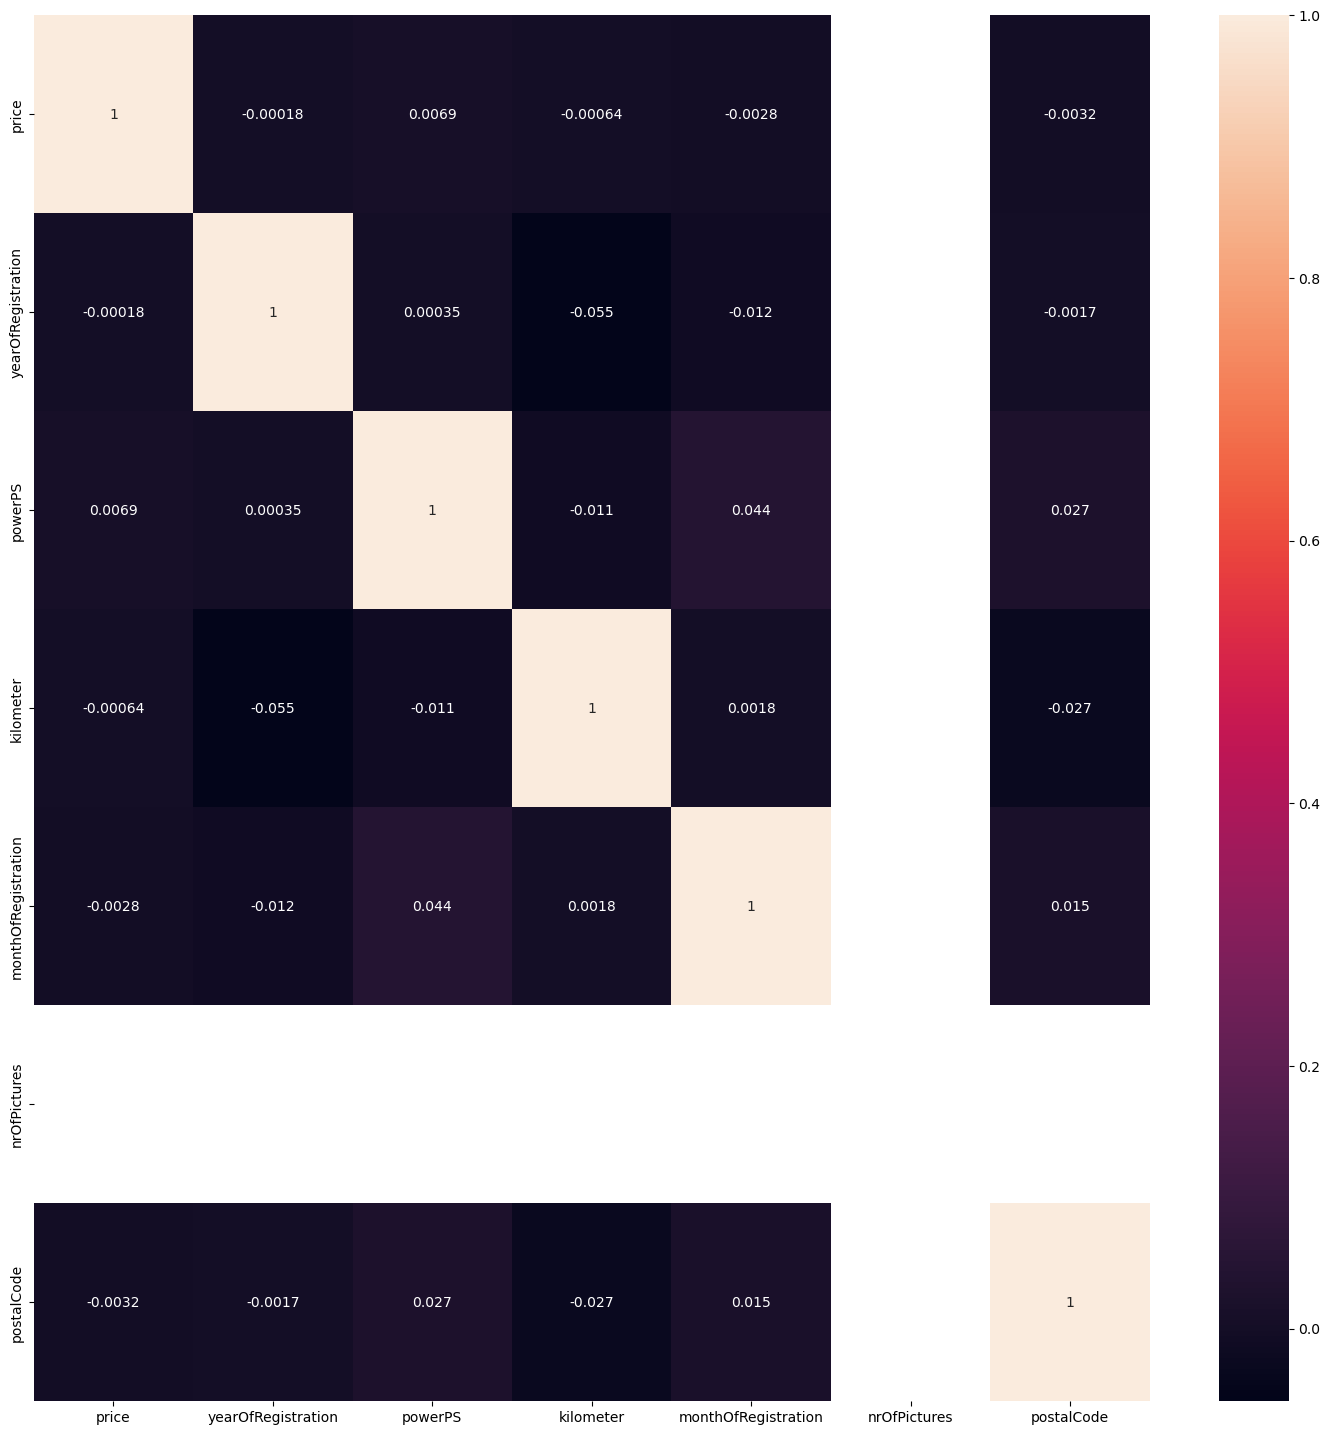

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot=True)

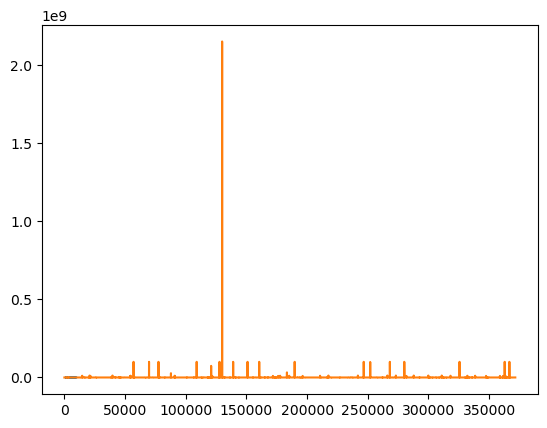

In [ ]:
plt.plot(df.yearOfRegistration,df.kilometer,df.price)

<AxesSubplot:xlabel='brand', ylabel='kilometer'>

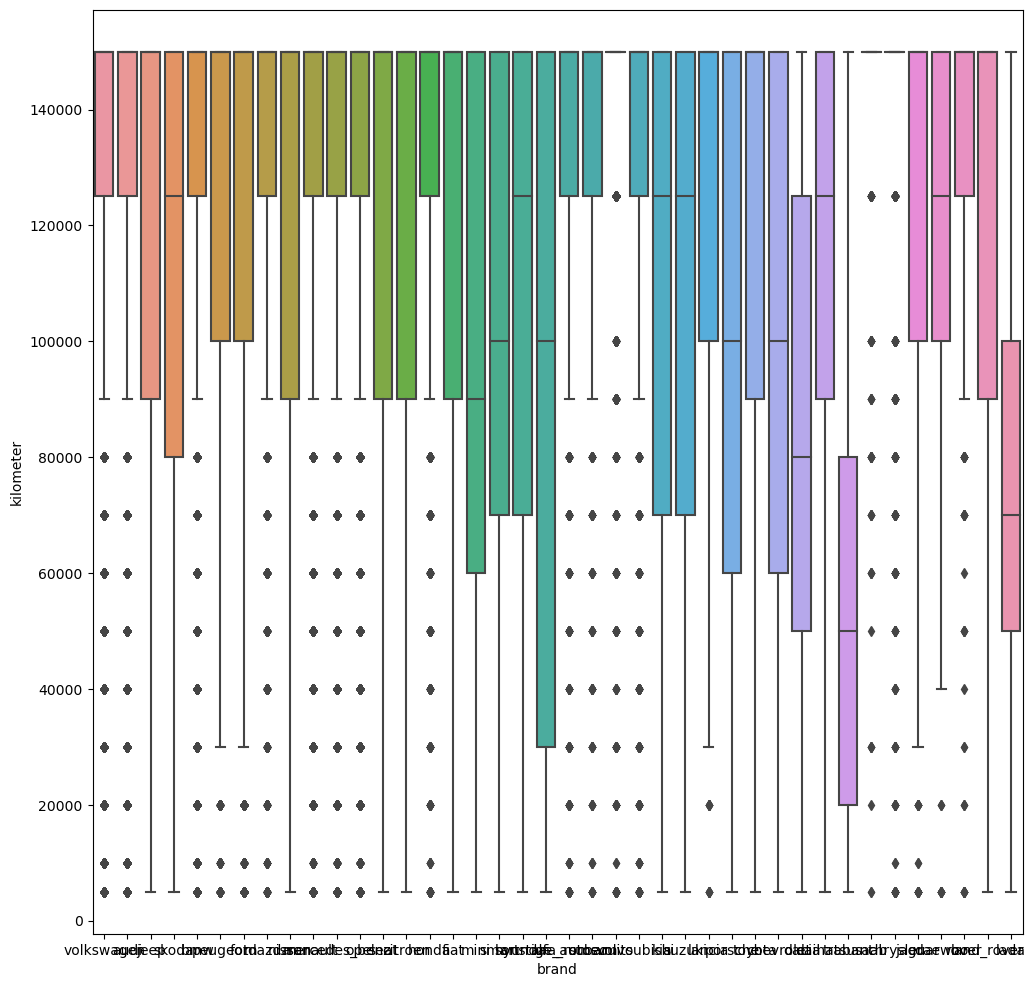

In [ ]:
plt.figure(figsize = (12,12))
sns.boxplot(x = 'brand', y = 'kilometer', data = df)

## Cleaning the Dataset

In [ ]:
print(df.seller.value_counts())

privat        371525
gewerblich         3
Name: seller, dtype: int64


In [ ]:
df[df.seller != 'gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
df=df.drop('seller',1)

In [ ]:
print(df.offerType.value_counts())

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64


In [ ]:
df[df.offerType != 'Gesuch']

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
df.drop('offerType',1)

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
print(df.shape)

(371528, 19)


In [ ]:
df=df[(df.powerPS>50)&(df.powerPS<900)]
print(df.shape)

(319709, 19)


In [ ]:
df=df[(df.yearOfRegistration>=1950)&(df.yearOfRegistration<2017)]
print(df.shape)

(309171, 19)


In [ ]:
df.drop(['name','abtest','dateCrawled','nrOfPictures','lastSeen','postalCode','dateCreated'],axis='columns',inplace=True)

In [ ]:
new_df = df.copy()
new_df = new_df.drop_duplicates(['price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType','notRepairedDamage'])

In [ ]:
new_df.gearbox.replace(('manuell','automatik'),('manual','automatic'), inplace=True)

In [ ]:
new_df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)

In [ ]:
new_df.vehicleType.replace(('kleinwagen','cabrio','kombi','andere'),('small car','convertible','combination','others'),inplace=True)

In [ ]:
new_df.notRepairedDamage.replace(('ja','nein'),('Yes','No'),inplace=True)

## Checking For Null Values

In [ ]:
df.isnull().sum()

offerType                  0
price                      0
vehicleType            11422
yearOfRegistration         0
gearbox                 5298
powerPS                    0
model                  11799
kilometer                  0
monthOfRegistration        0
fuelType               15887
brand                      0
notRepairedDamage      43481
dtype: int64

<AxesSubplot:>

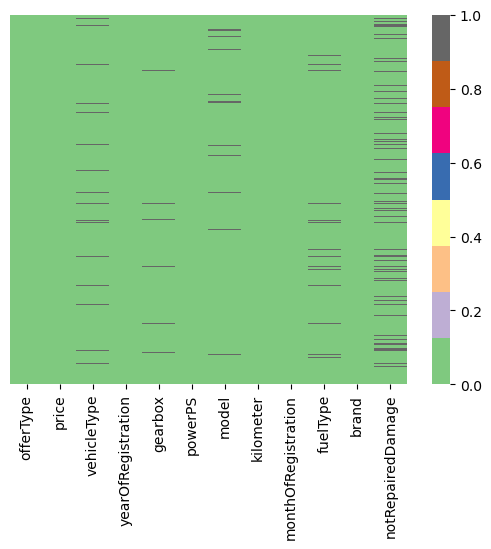

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')

## Removing the outliers </font>

In [ ]:
new_df=new_df[(new_df.price>=100)&(new_df.price<=150000)]
new_df['notRepairedDamage'].fillna(value='not-declared',inplace=True)
new_df['fuelType'].fillna(value='not-declared',inplace=True)
new_df['gearbox'].fillna(value='not-declared',inplace=True)
new_df['model'].fillna(value='not-declared',inplace=True)


## Saving the cleaned dataset</font>

In [ ]:
new_df.to_csv("autos_prepocessed.csv")

##  Label encoding the categorical data</font>

In [ ]:
labels = ['gearbox', 'notRepairedDamage','model','brand','fuelType','vehicleType']

mapper = {}
for i in labels: 
    mapper[i] = LabelEncoder()
    mapper[i].fit(new_df[i])
    tr = mapper[i].transform(new_df[i])
    np.save(str('classes'+i+'.npy'), mapper[i].classes_)
    print(i,";",mapper[i])
    new_df.loc[:,i+'_labels'] = pd.Series(tr, index=new_df.index)

labeled = new_df[['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        ]
                    + [x+"_labels" for x in labels]]

print(labeled.columns)

gearbox ; LabelEncoder()
notRepairedDamage ; LabelEncoder()
model ; LabelEncoder()
brand ; LabelEncoder()
fuelType ; LabelEncoder()
vehicleType ; LabelEncoder()
Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


# Splitting Data into Independant And Dependant Variables

In [ ]:
Y=labeled.iloc[:,0].values
X=labeled.iloc[:,1:].values
Y=Y.reshape(-1,1)

### <font color =orange>Splitting Data Into Train And Test</font>

In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

# __Model Building__

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


### <font color=orange> Choose The Appropriate Model </font>

In [ ]:
regressor = RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=34)
regressor.fit(X_train, np.ravel(Y_train,order='C'))

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=34)

### <font color=orange> Check The Metrics Of The Model </font>

In [ ]:
#predicting the values of test
y_pred = regressor.predict(X_test)

#the accuracy for test set
print(r2_score(Y_test,y_pred))

0.8337646405709781


## Save The Model

In [ ]:
filename = 'Data/resale_model.sav'
pickle.dump(regressor, open(filename, 'wb'))